# Case study on Unsupervised Machine Learning

## Dataset: 'Wine.csv'

### Do the following in the wine dataset.  
    1. Read the dataset to the python environment.
    2. Try out different clustering models in the wine dataset.
    3. Find the optimum number of clusters in each model and create the model with
        the optimum number of clusters.

### Objective:

    The dataset is a result of chemical analysis of wines derived from different cultivars.
    
    Hence, given a set of features, we need to clusterize the dataset and then 
    classify the no. of cultivars from which the wine has been obtained.
    
    Evidently, it is a classification and clustering problem.
    
    We are also supposed to use dimensionality reduction using PCA to get the visualizations
    of the clusters in a 2-D form.

In [1]:
#import libraries required for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress Warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Read the dataset to the python environment.

In [2]:
#Importing dataset
data = pd.read_csv('Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#features of dataset
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

#### The features are:

    1) Alcohol
    2) Malic acid
    3) Ash
    4) Alcalinity of ash
    5) Magnesium
    6) Total phenols
    7) Flavanoids
    8) Nonflavanoid phenols
    9) Proanthocyanins
    10) Color intensity
    11) Hue
    12) OD280 of diluted wines
    13) Proline

In [4]:
#shape of dataset
data.shape

(178, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
# Data cleaning
# Dropping duplicate values in dataset, if exist
data = data.drop_duplicates()
print(f'\nShape of dataframe:\n{data.shape}')


Shape of dataframe:
(178, 13)


No duplicate values in dataset.

### Insights:- It has 178 wine samples with 13 features for different chemical properties

The characteristics of the data set is as follows:

    Data Set Characteristics: Multivariate
    Number of Instances: 178
    Attribute Characteristics: Integer, Real
    Number of Attributes: 13
    Missing Values: None

## 2. Try out different clustering models in the wine dataset.

### Exploratory Data Analysis & Data visualization:

<AxesSubplot:>

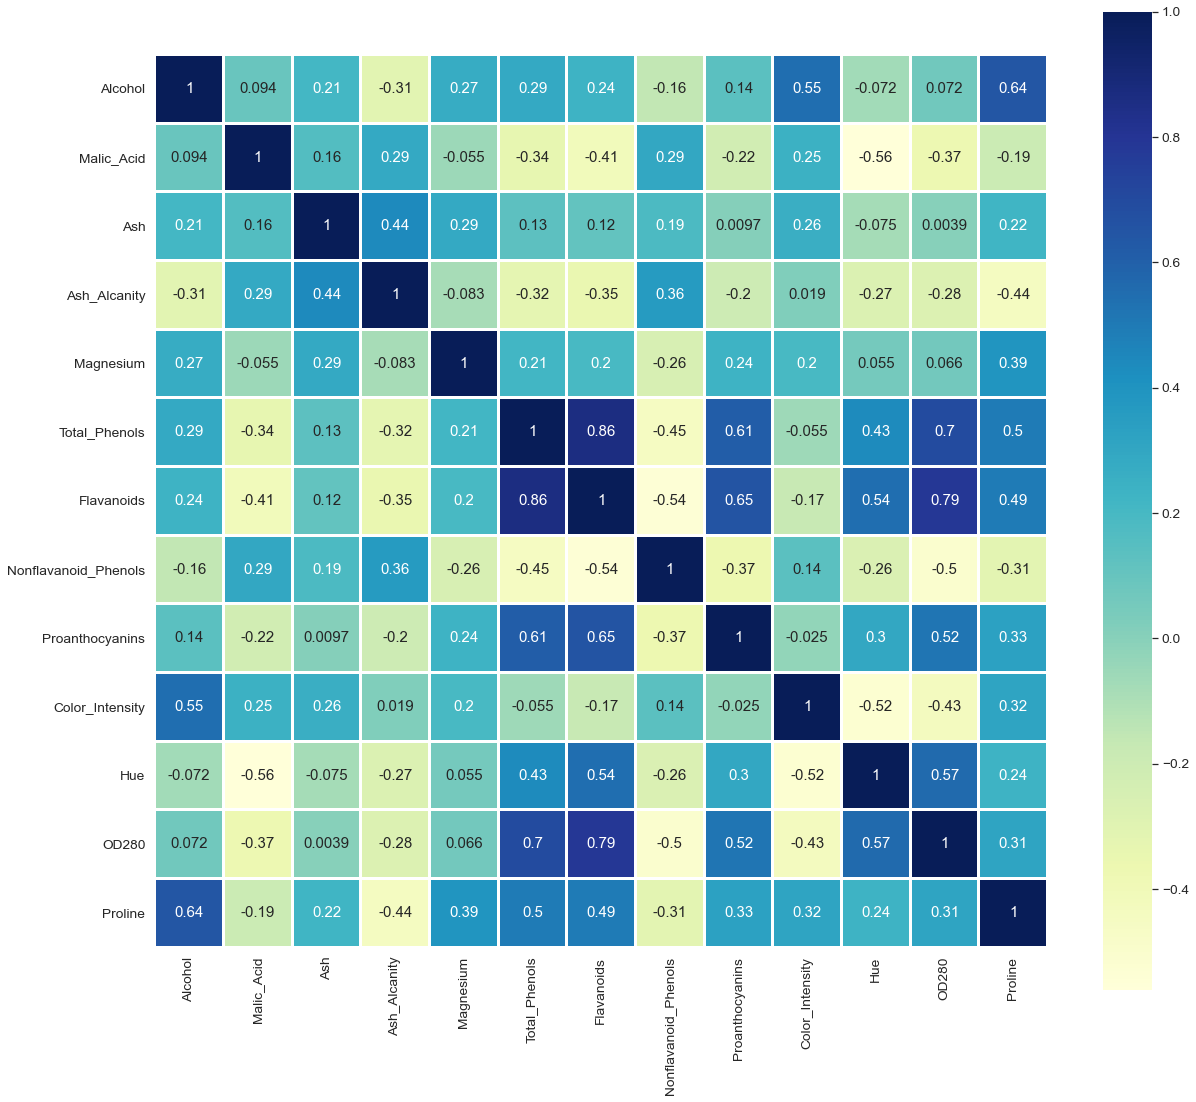

In [7]:
#plotting heatmap
plt.figure(figsize=[20,18], facecolor='white')
sns.set(style="whitegrid",font_scale=1.25)
sns.heatmap(data.corr(), annot=True, linewidths=2, square=True, cmap="YlGnBu")

#### Comments: Correlation of different features is seen in heatmap.

In [8]:
#To find those features whose correlation number is high:
#We set the correlation number greater than 0.75. 
#It means if two features has a correlation value above 0.75, one of the features may be dropped.

for a in range(len(data.corr())):
    for b in range(a):
        if abs(data.corr().iloc[a,b]) > 0.75:
            features = data.corr().columns[a]
            print(features)

Flavanoids
OD280


#### Comments: Features flavanoids & OD280 are highly correlated and one of these features may be dropped.

    From the above heatmap, we can see that there are some variables having very high correlation with repect to postive and negative.

    We will use PCA to overcome this multicollinearity. 
    
    This will not only take care of multicollinearity but also will preserve the valuable 
    information and also dimensionality reduction.

## Clustering Methods:-

## (1) K-Means Clustering:

In [9]:
#Making a copy of DataFrame index & data
df = data.copy(deep=True)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
#Let no of clusters = 5(random selection) 
#K_Means Clustering with no. of clusters = 5
from sklearn.cluster import KMeans
model_kmeans = KMeans(n_clusters = 5)
model_kmeans.fit(df)
labels = model_kmeans.predict(df)
print(labels)

[1 1 1 3 4 3 3 3 1 1 3 3 3 1 3 3 3 1 3 4 4 4 1 1 4 4 1 3 4 1 3 3 1 3 1 4 4
 1 1 4 4 1 1 0 4 1 1 1 1 3 1 3 1 3 1 1 1 3 3 2 0 2 0 2 2 0 2 2 4 0 4 2 2 1
 4 2 2 2 4 2 2 0 0 2 2 2 2 0 0 0 2 2 2 2 2 4 0 2 0 2 0 0 2 2 0 2 2 2 2 0 0
 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 0 2 0 0 0 0 0 2 0 0 0 4 2 0 4 4 2 0
 0 0 2 2 2 0 0 0 2 4 0 0 2 0 0 0 0 2 0 0 4 0 2 2 0 4 4 4 4 0]


In [11]:
#checking inertia value for k=5
model_kmeans.inertia_

916379.1871539167

## Elbow method to find no.of optimal clusters:

In [12]:
#Elbow method
ks = range(1,10)
inertia=[]
for k in ks:
    model_kmeans=KMeans(n_clusters = k, init='k-means++', max_iter=300, n_init=10, random_state=40)
    model_kmeans.fit(df)
    inertia.append(model_kmeans.inertia_)

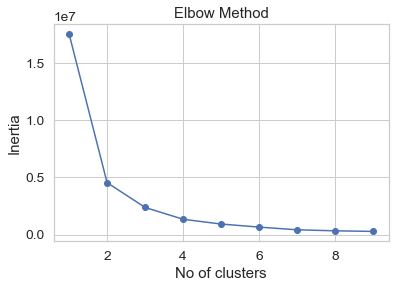

In [13]:
#plotting inertia values for different no of clusters
plt.plot(ks,inertia, '-o')
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

### No. of clusters can be selected as 3

In [14]:
#K_Means Clustering with no. of clusters = 3
model_kmeans = KMeans(n_clusters = 3)
model_kmeans.fit(df)
labels = model_kmeans.predict(df)
print(labels)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 2 1 2 2 1 1 1 2 2 0
 1 2 2 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2 1 2 1 2 2 2 1 2 2 2 2 1 2
 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1
 1 2 2 2 2 1 1 1 2 1 1 1 2 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 1 2]


### Comments:  Samples are grouped to 3 K-Means clusters

In [15]:
#Adding labels column to DataFrame
data_df = df.copy(deep=True)
data_df['labels'] = labels

In [16]:
print('Classification Labels: ',np.unique(data_df['labels']))

Classification Labels:  [0 1 2]


No handles with labels found to put in legend.


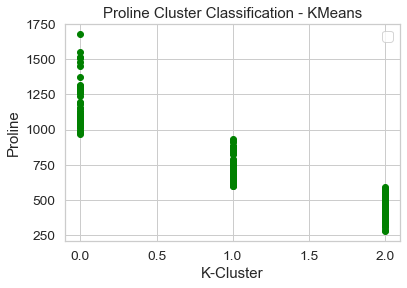

In [17]:
#checking the variation of feature 'proline' with each cluster
plt.scatter(data_df['labels'], data_df['Proline'], color = 'green')
plt.title('Proline Cluster Classification - KMeans')
plt.xlabel('K-Cluster')
plt.ylabel('Proline')
plt.legend()
plt.show();

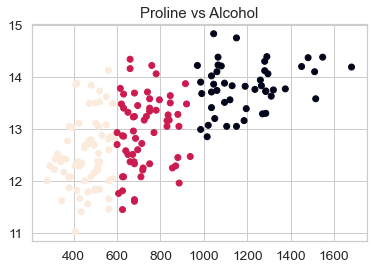

In [18]:
#scatterplot of Proline Vs Alcohol
pr = data_df['Proline']
alc = data_df['Alcohol']
plt.title('Proline vs Alcohol')
plt.scatter(pr, alc, c=labels)

#### Comments: 3 distinct cluster divisions of Alcohol & Proline

In [19]:
#checking inertia value for k=3
model_kmeans.inertia_

2370689.6867829696

### Comments: Inertia value is very high. Need to perform feature scaling.

### Feature Scaling:
    Feature scaling is a method used to standardize the range of features.
    It is also known as data normalization (or standardization).
    Normalization refers to the re-scaling the features in the range of [0, 1].
    To normalize our data, we can apply standard scaler to each feature column.

In [20]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(scaler, model_kmeans)
pipe.fit(df)
labels_sc = pipe.predict(df)
print(labels_sc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [21]:
#checking inertia value
model_kmeans.inertia_

1277.928488844643

### Comments: Inertia has been reduced to optimal value 1277 by feature scaling

In [22]:
#Normalization
from sklearn.preprocessing import Normalizer
norm=Normalizer()
pipe1 = make_pipeline(norm, model_kmeans)
pipe1.fit(df)
labels_nr = pipe1.predict(df)
print(labels_nr)

[2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 0 0 1 1 1 1 0 2 0 1 1
 2 0 0 0 1 0 0 2 1 1 1 0 1 1 2 2 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1
 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1
 1 0 0 0 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [23]:
#checking inertia value
model_kmeans.inertia_

0.10306150549665624

### Comments: Inertia value is reduced to 0.10 when normalized.

## (2) Reducing Dimensionality : Principal Component Analysis (PCA)

### Feature selection:
     Whenever we see that a model performs much better on a training dataset than on the test dataset, there might be an overfitting or high variance in our model.
    In other words, our model fits the parameters too closely to the training data but has greater generalization (or prediction) errors for real data.
    Here are some ways of reducing the generalization error:

    1. Choose a simpler model with fewer parameters.
    2. Introduce a penalty for complexity via regularization.
    3. Reduce the dimensionality of the data.

        It is difficult to visualize the data with so many features i.e high dimensional data so
        we can use PCA to find the two principal components hence visualize the data in 
        two dimensional space with a single scatter plot.

In [24]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data = scaler.fit_transform(df)

In [25]:
#PCA-scaled
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(178, 2)

Text(0, 0.5, 'Second Principal Component')

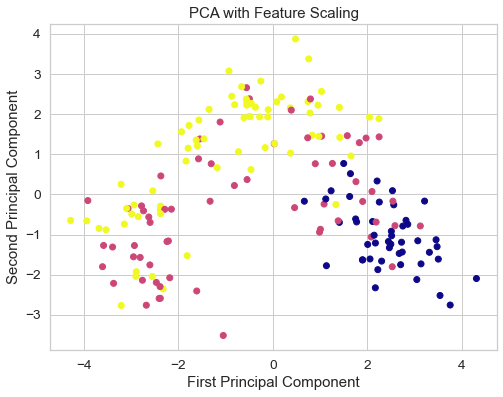

In [26]:
#plotting the PCA components with Scaled data
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = labels, cmap ='plasma')
plt.title('PCA with Feature Scaling')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [27]:
#normalizing the data
from sklearn.preprocessing import Normalizer
norm=Normalizer()
norm_data = norm.fit_transform(df)

In [28]:
#PCA-Normalized
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(norm_data)
x_pca = pca.transform(norm_data)
x_pca.shape

(178, 2)

Text(0, 0.5, 'Second Principal Component')

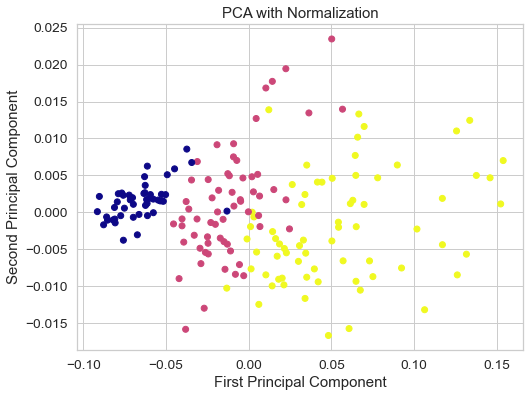

In [29]:
#plotting the PCA components with Normalized data
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = labels, cmap ='plasma')
plt.title('PCA with Normalization')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

### Comments:- Normalized data is classified into 3 distinct clusters using PCA feature reduction. But we see overlapping of datapoints into different clusters. So better do not prefer Principal Component Analysis in this case as dimensionality reduction is not much helpful here.

In [30]:
#displaying the PCA components
pca.components_

array([[ 0.11967376,  0.02493389,  0.02287173,  0.2334577 ,  0.9475191 ,
         0.02006888,  0.01730099,  0.00397612,  0.01438307,  0.02402529,
         0.0098415 ,  0.02579363, -0.17313082],
       [-0.25819916, -0.11280463, -0.06416612, -0.91265935,  0.2604945 ,
        -0.02946121, -0.01570738, -0.01883443, -0.02177346, -0.09869587,
        -0.00852837, -0.0504888 , -0.03715241]])

<AxesSubplot:title={'center':'Correlation of Features with Principal Components'}>

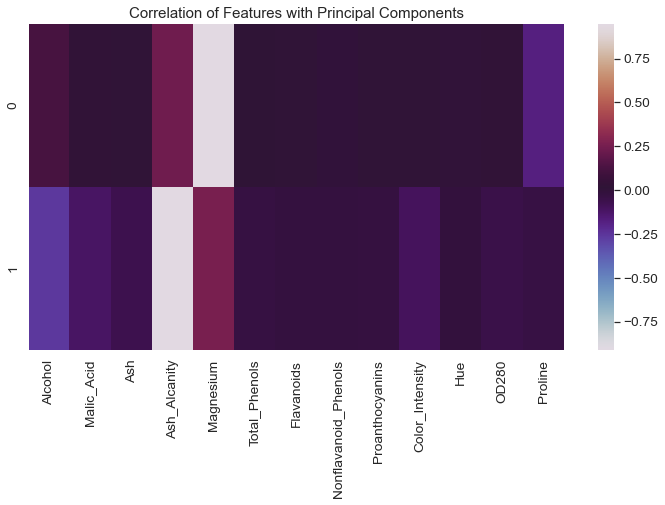

In [31]:
#Heatmap
map= pd.DataFrame(pca.components_,columns=df.columns)
plt.figure(figsize=(12,6))
plt.title('Correlation of Features with Principal Components')
sns.heatmap(map,cmap='twilight')

### Comments:- 
This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

## (3) Hierarchical - Agglomerative Clustering

In [32]:
#Normalization of DataFrame
norm = Normalizer()
df = norm.fit_transform(df)
df = pd.DataFrame(df)

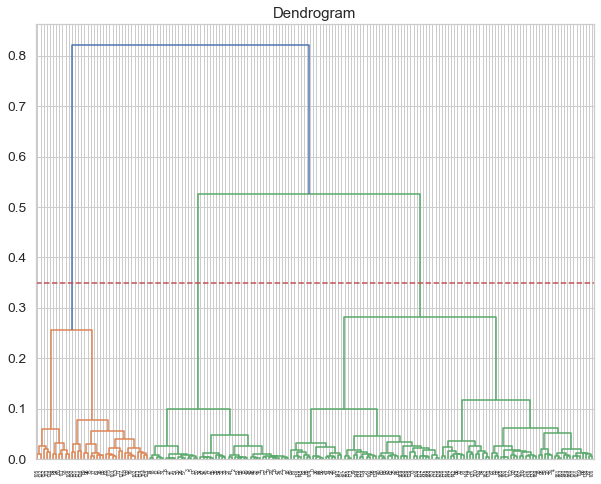

In [33]:
#Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df, method='ward')

plt.figure(figsize=(10,8))
plt.title('Dendrogram')

dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts='True')

plt.hlines(0.35,0,5000, colors='r', linestyle='dashed')

plt.show()

### Comments: Horizontal line cuts the dendrogram at 3 points. Therfore no. of clusters can be taken as 3

In [34]:
#Agglomerative Clustering for 3 clusters
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels_agg=cluster.fit_predict(df)
labels_agg

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [35]:
#Adding labels_agg to DataFrame
df_agg = df.copy(deep=True)
df_agg['labels'] = labels_agg
df_agg.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,labels
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738,0
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336,2
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176,2
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961,2
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753,0


No handles with labels found to put in legend.


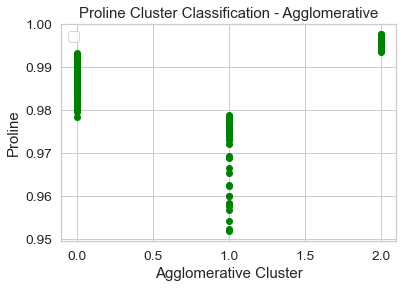

In [36]:
#checking the variation of feature 'proline' with each cluster
plt.scatter(df_agg['labels'], df_agg.iloc[:, 12], color = 'green')
plt.title('Proline Cluster Classification - Agglomerative')
plt.xlabel('Agglomerative Cluster')
plt.ylabel('Proline')
plt.legend()
plt.show();

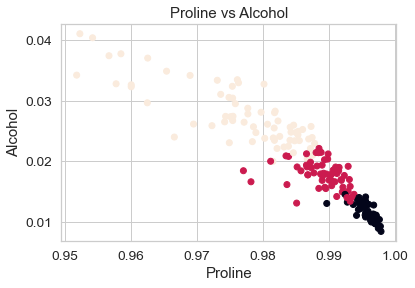

In [37]:
#scatterplot of Proline Vs Alcohol
prg = df_agg.iloc[:, 12]
alcg = df_agg.iloc[:, 0]
plt.title('Proline vs Alcohol')
plt.xlabel('Proline')
plt.ylabel('Alcohol')
plt.scatter(prg, alcg, c=labels)

### Comments: In Agglomerative clustering, feature clustering not well defined as in K-Means method

## 3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

### By comparing different clustering methods, K-Means is more efficient here in defining clusters

### So, we select K-Means Clustering Method and Optimum no of Clusters = 3

### We have created K-Means model with 3 clusters earlier in this code and passed to DataFrame 'data_df'

In [38]:
#passing labels after Normalization, labels_nr to DataFrame
data_df['labels'] = labels_nr

In [39]:
#Grouping feature-mean according to each cluster in df1
df1 = data_df.groupby('labels', as_index=False).aggregate({'Alcohol': [np.mean],
    'Malic_Acid': [np.mean],
    'Ash': [np.mean],
    'Ash_Alcanity': [np.mean],
    'Magnesium': [np.mean],
    'Total_Phenols': [np.mean],
    'Flavanoids': [np.mean],
    'Nonflavanoid_Phenols': [np.mean],
    'Proanthocyanins': [np.mean],
    'Color_Intensity': [np.mean],
    'Hue': [np.mean],
    'OD280': [np.mean],
    'Proline':[np.mean]
})
df1.columns = [['K-Means','Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
                 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
                 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']]
df1

,K-Means,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0,12.330541,2.241622,2.308108,20.921622,97.837838,2.288649,2.141892,0.349730,1.591081,3.651892,1.000000,2.689459,415.162162
1,1,12.876173,2.658889,2.351852,20.235802,98.432099,1.995062,1.455185,0.408889,1.436049,5.458519,0.874444,2.277654,629.246914
2,2,13.581833,1.959333,2.422333,17.615000,102.683333,2.704167,2.734833,0.305833,1.799833,5.384667,1.043267,3.014667,1110.283333


### Comments:- Mean values of different features corresponding to their clusters is calculated. Proline can be assumed to be a prominent feature in this dataset.

<AxesSubplot:title={'center':'Cluster level vs Proline'}, xlabel='labels', ylabel='Proline'>

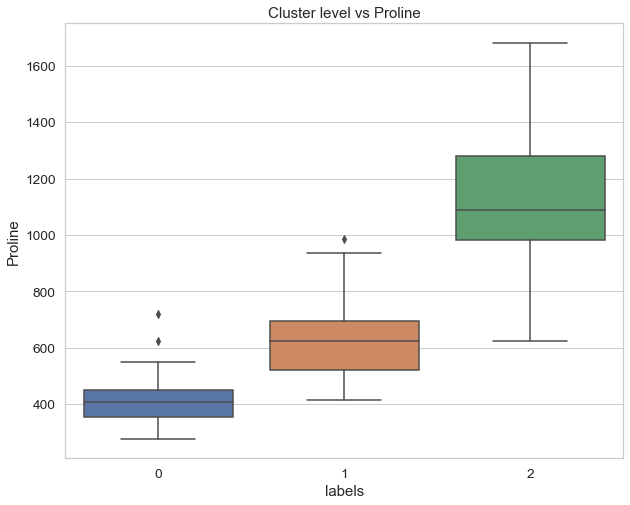

In [40]:
# Visualising the distribution of the cluster labels for column proline from K-Means Clustering

plt.figure(figsize=(10,8))
plt.title('Cluster level vs Proline')
sns.boxplot(x='labels', y='Proline', data=data_df)

### Comments:- Boxplot shows clusterification of feature Proline to 3 categories with distinct Median and range limits. Outlier handling may be ignored from preprocessing as this a small dataset with few features.

    Category 1 - Low Quality Wine Cultivar - Low Median Value
    Category 2 - Medium Quality Wine Cultivar
    Category 3 - High Quality Wine Cultivar - High median Value
    
    Note:- Label nos(0,1,2) for each category varies each time we run the code.

### Training the Model:-

    We shall use the following models:

    1.Random Forest Classifier
    2.Support Vector Machines

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [42]:
#Adding labels_nr column of K-Means Clustering to DataFrame
data1 = data.copy(deep=True)
data1["labels"] = labels_nr

In [43]:
data1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,labels
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [44]:
data1.shape

(178, 14)

In [45]:
#using indexloc
#x = df.iloc[:, 0:14]
#y = df.iloc[:, 14]
#y = pd.DataFrame(y)

In [46]:
#feature columns
x= data1.drop('labels', axis=1)

#target column
y= pd.DataFrame(data1['labels'].astype('float64'))

In [47]:
x.shape

(178, 13)

In [48]:
y.shape

(178, 1)

In [49]:
# As we can see from the code above, we assigned the feature columns 0-12 to the variable x;
# We assigned the class labels (the last column) to the variable y.

In [50]:
#Normalization of feature columns
norm = Normalizer()
df = norm.fit_transform(x)
df = pd.DataFrame(df)

In [51]:
#splitting to train & test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

### 1. Random Forest Classifier Model

In [52]:
#RFC Algorithm
RFC = RandomForestClassifier(n_estimators = 100, random_state = 0, min_samples_split=5, criterion='gini', max_depth=5)
RFC.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, random_state=0)

In [53]:
#test set prediction accuracy
y_pred_test = RFC.predict(x_test)

accuracy_test=accuracy_score(y_test, y_pred_test)

#train set accuracy
y_pred_train = RFC.predict(x_train)

accuracy_train=accuracy_score(y_train, y_pred_train)

print("Train Accuracy  : ",accuracy_train)
print("Test Accuracy  : ",accuracy_test)

Train Accuracy  :  0.9647887323943662
Test Accuracy  :  0.8055555555555556


In [54]:
#The accuracies for training set is 96% and test set is 80%, which suggests no considerable overfitting in our model.

In [55]:
#classification report
print('Classification Report')
print(classification_report(y_test, y_pred_test))

Classification Report
              precision    recall  f1-score   support

         0.0       0.83      0.71      0.77         7
         1.0       0.81      0.85      0.83        20
         2.0       0.78      0.78      0.78         9

    accuracy                           0.81        36
   macro avg       0.81      0.78      0.79        36
weighted avg       0.81      0.81      0.80        36



In [56]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = RFC, X = x_train, y = y_train, cv = 10)
rfc_eval.mean()

0.8380952380952381

#### Comments:- Overall accuracy of RFC > 80%. Model prediction is good.

In [57]:
#get feature importance
fea_importance = RFC.feature_importances_

#summarize feature importance
for i,j in enumerate(fea_importance):
    print('Feature: %0d, Score: %.5f' % (i,j))
    
#print(RFC.feature_importances_)

Feature: 0, Score: 0.09036
Feature: 1, Score: 0.02532
Feature: 2, Score: 0.01955
Feature: 3, Score: 0.05957
Feature: 4, Score: 0.04106
Feature: 5, Score: 0.06496
Feature: 6, Score: 0.12516
Feature: 7, Score: 0.04154
Feature: 8, Score: 0.03026
Feature: 9, Score: 0.07184
Feature: 10, Score: 0.03423
Feature: 11, Score: 0.05207
Feature: 12, Score: 0.34409


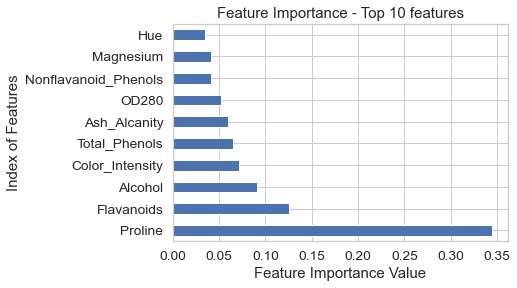

In [58]:
#plot graph of feature importance

feature_imp = pd.Series(RFC.feature_importances_, index=x.columns)
feature_imp.nlargest(10).plot(kind='barh')
plt.ylabel('Index of Features')
plt.xlabel('Feature Importance Value')
plt.title('Feature Importance - Top 10 features')
plt.show()

### Insights:-
    Proline is found in higher concentrations in wine.
    Proline, alcohol & flavanoids are closely related to the flavor, taste and functional activity of wine.

### 2. Support Vector Machines Model

In [59]:
#svc algorithm
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

#Evaluate predictions
print('Classification Report: ')
print(classification_report(y_test, y_pred))

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86         7
         1.0       0.90      0.95      0.93        20
         2.0       1.00      0.89      0.94         9

    accuracy                           0.92        36
   macro avg       0.92      0.90      0.91        36
weighted avg       0.92      0.92      0.92        36



### Comments:- Accuracy of SVM for 3 clusters are more than 80%. SVM Model prediction is good.

In [60]:
#Finding best parameters for our SVC model
params = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=10)

In [61]:
#Fitting data to GridSearchCV
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [62]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [63]:
#Let's run our SVC again with the best parameters
svc2 = SVC(C=0.1, gamma=0.1, kernel='linear')
svc2.fit(x_train, y_train)
y_pred_svc = svc2.predict(x_test)

#Evaluate predictions
print('Classification Report: ')
print(classification_report(y_test, y_pred_svc))

Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      1.00      1.00        20
         2.0       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### Comments:- Accuracy of SVM for all 3 clusters after fitting best parameters is more than 95%. SVM Model prediction is excellent.

## Conclusion:-  
Among various ML models, we compare the performance of Support Vector Machine (SVM) & RFC to categorize wine quality from 3 different cultivars.  

Multiple parameters that determine the wine quality are analyzed.  

Our analysis shows that SVC surpasses RFC models’ performance with F1 score, accuracy & precision.  

By comparing different clustering methods, K-Means is more efficient here in defining clusters.

Proline is an important feature of this dataset.

This work demonstrates, how statistical analysis can be used to identify the components that mainly control the wine quality and classify it into different groups by using Unsupervised ML Clustering methods.